In [1]:
import sys, os

import numpy as np
import pandas as pd
from nptdms import TdmsFile
from dateutil.relativedelta import relativedelta
from datetime import datetime

### plotting libs
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

### some convenient magics
%load_ext autoreload
%autoreload 2

### Directory setup
cwd = os.getcwd()
datapath = os.path.abspath(os.path.join(cwd, '../../data/'))
figpath = os.path.abspath(os.path.join(cwd, 'figs/'))

In [12]:
filename = os.path.join(datapath, 'DOE15_SlowData_2020_02_10_14_34_59_1Hz.tdms')
tdms_file = TdmsFile(filename)

channels = ['LabVIEW Timestamp','Windspeed_87m','WD1_87m']+['WD_Mod_Active','WD_Nacelle','WD_Nacelle_Mod']

dataset = {channel: tdms_file.object('SlowData', channel).data for channel in channels}
dataset['LabVIEW Timestamp'] = [datetime.fromtimestamp(x- 2082844800) for x in dataset['LabVIEW Timestamp']]
dataset = pd.DataFrame.from_dict(dataset)
dataset = dataset.set_index('LabVIEW Timestamp')

In [24]:
tdms_file.object('SlowData', 'OPC_OpCtl_TurbineStatus').data 
# Should be == 2 for active, == 0 for background noise


array([2., 2., 2., ..., 2., 2., 2.])

In [23]:
dataset.head(5)

,Windspeed_87m,WD1_87m,WD_Mod_Active,WD_Nacelle,WD_Nacelle_Mod
LabVIEW Timestamp,,,,,
2020-02-10 14:34:59.500,4.893892,159.343230,1.0,NaN,NaN
2020-02-10 14:35:00.500,4.860565,160.504132,1.0,NaN,NaN
2020-02-10 14:35:01.500,4.946382,155.384846,1.0,NaN,NaN
2020-02-10 14:35:02.500,4.976383,154.345168,1.0,NaN,NaN
2020-02-10 14:35:03.500,4.761951,154.056960,1.0,NaN,NaN


In [35]:
all_channels = [v.channel for k,v in tdms_file.objects.items()]

In [4]:
data1T = dataset.resample('1T').mean()

wdbins = np.arange(100, 201, 10)
wsbins = np.arange(2,7.1) + 0.5

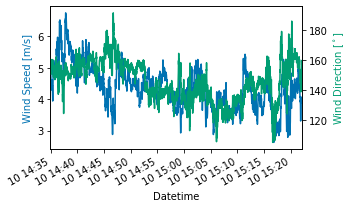

In [5]:
fig, ax = plt.subplots(figsize=(5,3))

dataset['Windspeed_87m'].plot(ax=ax, c='C0')
# ax.plot(timestamp, windspeed, c='C0')
ax.set_xlabel('Datetime')
ax.set_ylabel('Wind Speed [m/s]', c='C0')

ax2=ax.twinx()
dataset['WD1_87m'].plot(ax=ax2, c='C1')
# ax2.plot(timestamp, winddirection, c='C1')
ax2.set_ylabel('Wind Direction [$^\circ$]', c='C1')

plt.tight_layout()

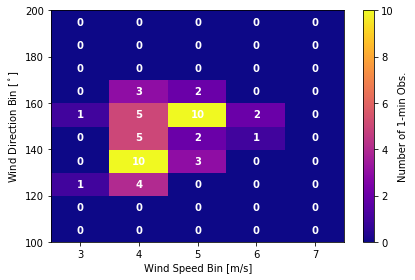

In [6]:
fig, ax = plt.subplots()

cpct,_,_,counts = ax.hist2d(data1T[channels[1]], data1T[channels[2]], [wsbins, wdbins], cmap='plasma')

for i in range(len(wdbins)-1):
    for j in range(len(wsbins)-1):
        ax.text(wsbins[j]+0.5, wdbins[i]+5, np.int(cpct.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar(counts, ax=ax, label='Number of 1-min Obs.')
ax.set_xlabel('Wind Speed Bin [m/s]')
ax.set_ylabel('Wind Direction Bin [$^\circ$]')

plt.tight_layout()
